In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T_shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

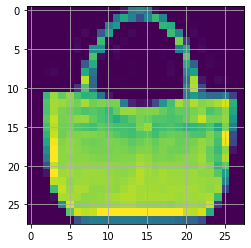

In [7]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0 

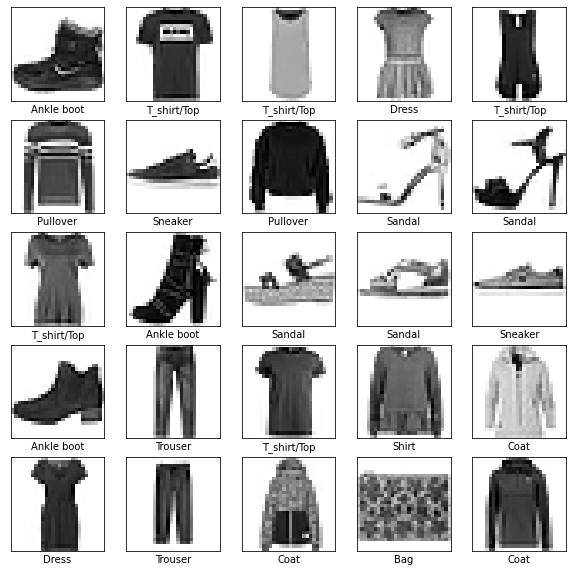

In [15]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [47]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation= tf.nn.relu),
                          keras.layers.Dense(10, activation= tf.nn.softmax)])

In [48]:
model.compile(optimizer= tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [49]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2936 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8853
Accuracy 0.8852999806404114


In [32]:
predictions = model.predict(test_images)

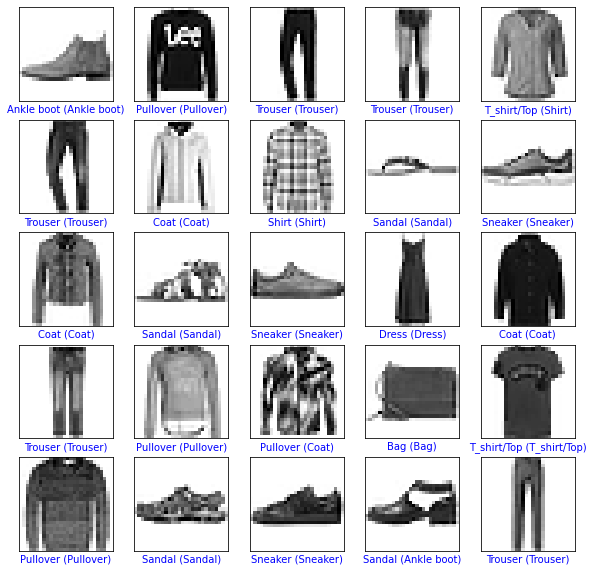

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap= plt.cm.binary)
  predicted_labels = np.argmax(predictions[i])
  true_labels = test_labels[i]
  if predicted_labels == true_labels:
    color = 'blue'
  else:
    color == 'red'
  plt.xlabel('{} ({})'.format(class_names[predicted_labels], class_names[true_labels]), color = color)